In [2]:
import pandas as pd
df = pd.read_csv('firstTest.csv')
df.head()

,Unnamed: 0,id,type,content,channel_id,author,attachments,embeds,mentions,mention_roles,...,edited_timestamp,flags,components,serverName,channelName,message_reference,referenced_message,reactions,sticker_items,webhook_id
0,0,949180274598608946,0,SUSHI THE BESTTTTTTTTTTTTTTTTTT,749777962995548210,"{'id': '674309491977617412', 'username': 'Shee...",[],[],[],[],...,NaN,0,[],SushiSwap Community,Price Talk,NaN,NaN,NaN,NaN,NaN
1,1,949165318226448384,0,Crypto cap total got rejected 🔨,749777962995548210,"{'id': '858860247304372255', 'username': 'drst...",[],[],[],[],...,NaN,0,[],SushiSwap Community,Price Talk,NaN,NaN,NaN,NaN,NaN
2,2,949165042107031593,0,Very long sushi bearish,749777962995548210,"{'id': '534334502852624403', 'username': 'mame...",[],[],[],[],...,NaN,0,[],SushiSwap Community,Price Talk,NaN,NaN,NaN,NaN,NaN
3,3,949141318045687818,0,Putin just want cheap sushi,749777962995548210,"{'id': '858860247304372255', 'username': 'drst...",[],[],[],[],...,NaN,0,[],SushiSwap Community,Price Talk,NaN,NaN,NaN,NaN,NaN
4,4,949141248432828456,0,Apparently it is ‘under control’ lol,749777962995548210,"{'id': '858860247304372255', 'username': 'drst...",[],[],[],[],...,NaN,0,[],SushiSwap Community,Price Talk,NaN,NaN,NaN,NaN,NaN


In [3]:
tweet_text_list = df['content'].tolist()

tweet_text_list

['SUSHI THE BESTTTTTTTTTTTTTTTTTT',
 'Crypto cap total got rejected 🔨',
 'Very long sushi bearish',
 'Putin just want cheap sushi',
 'Apparently it is ‘under control’ lol',
 'If a nuclear power plant explodes, the whole of Europe will be affected',
 'No one told him to attack Russia just to protect Ukraine from being invaded, at least nuclear power plants from being attacked',
 'Idiotic',
 'U guys really think the US should just start bombin Russia',
 'Byden is the weakest president in American history',
 'Winter is coming',
 '<:sadge:751656728126554122>',
 'Why is sushi bleeding so bad ?',
 'Lol',
 'War is a shitcoin',
 "I can't believe we take sides in a war that doesn't involve us . It's feels like gambling . I just want peace. I have friends in Russia and Ukraine they both have arguments for what they are fighting but at the end of the day it's 2022 can we not sit at a table and talk ? Can we not use diplomacy?",
 'He’s obviously lost his mind',
 'Can’t believe we haven’t stepped i

In [16]:
import numpy as np
import re

stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from",'see','will','market','sushi']

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [17]:
my_results = [clean_tweet(tw) for tw in tweet_text_list]
my_results

C:\Users\geral\AppData\Local\Temp/ipykernel_25280/3680458872.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['bestttttttttttttttttt',
 'crypto cap total got rejected',
 'very long bearish',
 'putin just want cheap',
 'apparently it is under control lol',
 'if nuclear power plant explodes whole europe be affected',
 'no one told him attack russia just protect ukraine being invaded at least nuclear power plants being attacked',
 'idiotic',
 'u guys really think us should just start bombin russia',
 'byden is weakest president american history',
 'winter is coming',
 'sadge 751656728126554122',
 'why is bleeding so bad',
 'lol',
 'war is shitcoin',
 'i cant believe we take sides war that doesnt involve us its feels like gambling i just want peace i have friends russia ukraine they both have arguments what they are fighting but at end day its 2022 can we not sit at table talk can we not use diplomacy',
 'he s obviously lost his mind',
 'can t believe we haven t stepped yet stop putin',
 'it seems one nuclear power plant is fire ukraine crypto got panicked',
 'one more dump',
 'its not good thing

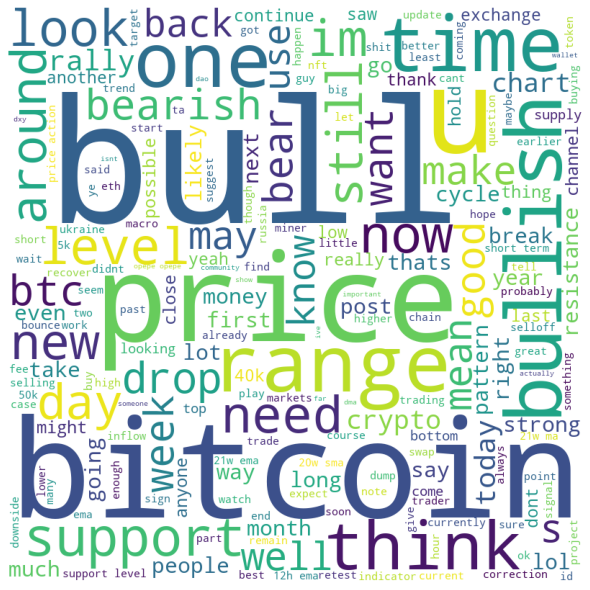

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()